In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
from sklearn.ensemble import RandomForestClassifier



In [2]:
data_train=pd.read_csv("/content/drive/MyDrive/sign_mnist_train.csv")
data_test=pd.read_csv("/content/drive/MyDrive/sign_mnist_test.csv")

In [4]:
# In this section you will have to add another dimension to the data
#training_images = np.expand_dims(training_images, axis=3)
#testing_images = np.expand_dims(testing_images, axis=3)

training_images = data_train.iloc[:,1:].values
training_labels = data_train.iloc[:,0].values

testing_images = data_test.iloc[:,1:].values
testing_labels = data_test.iloc[:,0].values

training_images = training_images.reshape(-1,28,28,1)
testing_images = testing_images.reshape(-1,28,28,1)
# Flatten the images
train_features = training_images.reshape(training_images.shape[0], -1)
test_features = testing_images.reshape(testing_images.shape[0], -1)


print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


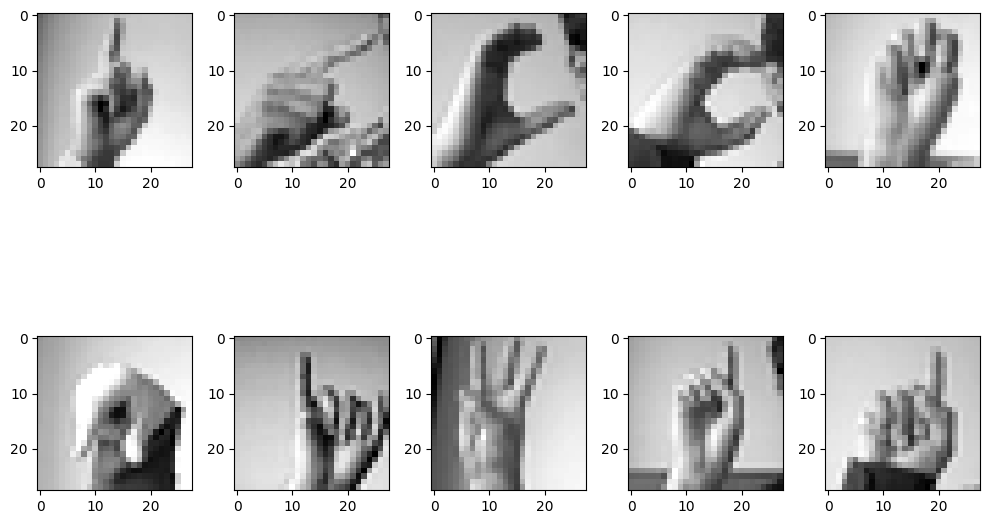

In [5]:
# Plotting the first 10 images
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,5)
fig.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(training_images[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [6]:
# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)

# Keep These
print(training_images.shape)
print(testing_images.shape)

# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [7]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(train_features, training_labels)

# Evaluate the classifier
accuracy = rf_classifier.score(test_features, testing_labels)
print("Accuracy:", accuracy)

Accuracy: 0.8163692136084774


[ 6  5 10  0  3]
              precision    recall  f1-score   support

     Class 0       0.91      1.00      0.95       331
     Class 1       0.98      0.93      0.95       432
     Class 2       0.94      1.00      0.97       310
     Class 3       0.83      0.98      0.90       245
     Class 4       0.87      0.99      0.93       498
     Class 5       0.93      0.91      0.92       247
     Class 6       0.93      0.86      0.89       348
     Class 7       0.99      0.94      0.96       436
     Class 8       0.83      0.80      0.82       288
    Class 10       0.72      0.64      0.68       331
    Class 11       0.82      1.00      0.90       209
    Class 12       0.88      0.70      0.78       394
    Class 13       0.75      0.52      0.61       291
    Class 14       0.99      0.88      0.93       246
    Class 15       0.92      1.00      0.96       347
    Class 16       0.91      0.99      0.95       164
    Class 17       0.29      0.55      0.38       144
    Class 

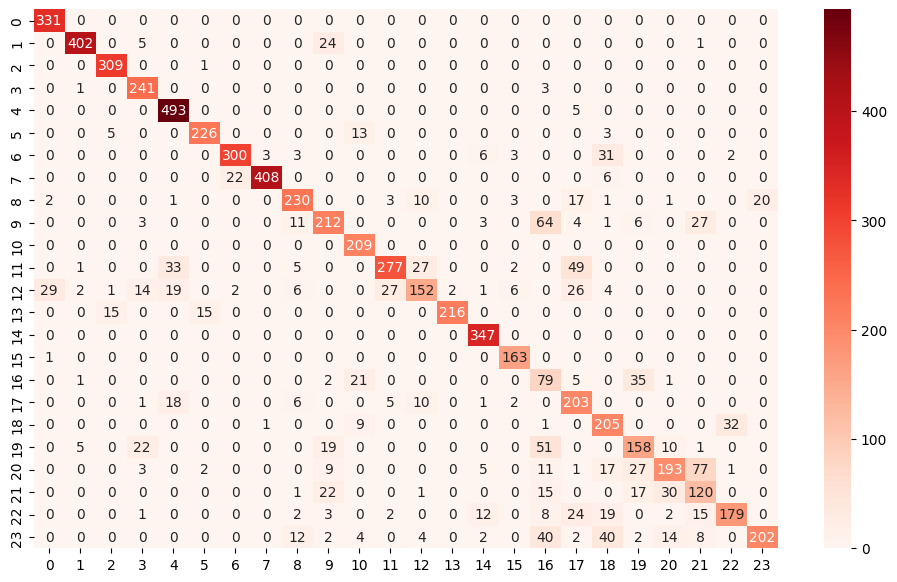

In [11]:
# Make predictions
predictions = rf_classifier.predict(test_features)

# Output
print(predictions[:5])  # Displaying the first 5 predictions

#Output
#array([ 6,  8, 11, 14, 18])

# Precision, recall, f1-score for all the classes
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Assuming you have 24 classes in your target data
classes = ["Class " + str(i) for i in range(25) if i != 9]

# Adjust the target_names parameter accordingly
print(classification_report(data_test['label'], predictions, target_names=classes))




# Confusion Matrix for the model predictions
cm = confusion_matrix(data_test['label'],predictions)

plt.figure(figsize=(12,7))
g = sns.heatmap(cm, cmap='Reds',annot=True,
           fmt='')